In [133]:
## Assignment 2 
## Gargi Vaidya
## Part 4. 

Convergence Plot of Value Iteration - 


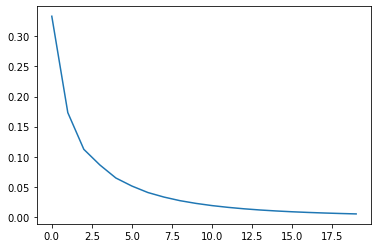

Value Function 
 [0.05073115 0.04645272 0.06346115 0.04434864 0.07489288 0.
 0.10590912 0.         0.13101275 0.23708198 0.29223709 0.
 0.         0.37187037 0.63459526 0.        ]
Policy 
 [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]


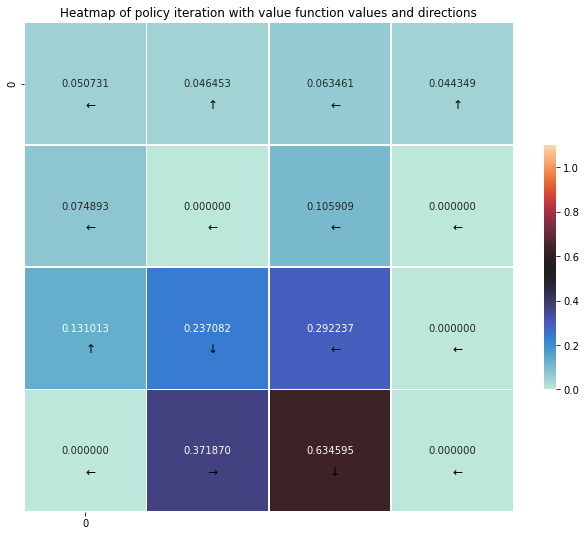

In [2]:
import gym
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn
from matplotlib.colors import LogNorm
env = gym.make('FrozenLake-v0')

# print('Number of Actions', env.nA) 
# print('Number of States ', env.nS)
# print('P[10,3]', env.P[10][3])

def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function \n',value_func)
    print('Policy \n',policy_int)
    plt.show()
    
def value_iteration():
    V = np.zeros(env.nS)
    V_ = np.zeros(env.nS)
    diff = []
    for t in range(100):        
        for x in range(env.nS):            
            Q = []
            for a in range(env.nA):
                q = 0
                for i in range(len(env.P[x][a])):
                    p, s_, r, done = env.P[x][a][i]
                    q += p * (r + gamma * V[s_])
                Q.append(q)
                a_max = np.argmax(np.asarray(Q))
                V_[x] = Q[a_max]
        diff.append(linalg.norm(V_ - V, 2))
        if diff[-1] < epsilon:
            print("Convergence Plot of Value Iteration - ")
#             print("Number of iterations to converge: ", t+1)
            plt.plot(range(int(t+1)), diff)
            plt.show()
            break
        else:
            V = V_.copy()   
    return V

def optimal_policy(V):
    pi = np.zeros(env.nS, dtype=int)
    Q_star = np.zeros((env.nS, env.nA))
#     pi = np.zeros((env.nS, env.nA))
    for x in range(env.nS):
        Q = []
        for a in range(env.nA):
            q = 0
            for i in range(len(env.P[x][a])):
                p, s_, r, done = env.P[x][a][i]
                q += p * (r + gamma * V[s_])
            Q.append(q)
#         Q_star.append(Q)
        Q_star[x, :] = Q
        a_star = np.argmax(np.asarray(Q))
        pi[x] = a_star
    return pi, Q_star

gamma = 0.9
epsilon = 5e-3
V_star = value_iteration()
pi_star, Q_star = optimal_policy(V_star)
fancy_visual(V_star, pi_star)

In [3]:
print("Optimal Q-Value Function - \n", Q_star, "\n")
print("Optimal State Value Function - \n", V_star, "\n")
print("Optimal Policy - \n", pi_star, "\n")

Optimal Q-Value Function - 
 [[0.05290655 0.05162303 0.05162303 0.04437451]
 [0.02915516 0.03425769 0.03297416 0.04819351]
 [0.0647469  0.05901315 0.06411567 0.04627875]
 [0.03234294 0.03234294 0.02660918 0.04564753]
 [0.07699103 0.06177169 0.05452317 0.03768721]
 [0.         0.         0.         0.        ]
 [0.10670947 0.08767113 0.10670947 0.01903834]
 [0.         0.         0.         0.        ]
 [0.06177169 0.11042842 0.09359246 0.13289629]
 [0.15086494 0.23853606 0.19923224 0.12697495]
 [0.29327591 0.26150317 0.22215132 0.10289733]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18268571 0.30193969 0.37306429 0.26150317]
 [0.38961082 0.63527302 0.61138304 0.53256557]
 [0.         0.         0.         0.        ]] 

Optimal State Value Function - 
 [0.05073115 0.04645272 0.06346115 0.04434864 0.07489288 0.
 0.10590912 0.         0.13101275 0.23708198 0.29223709 0.
 0.         0.37187037 0.63459526 0.        ] 

Optimal Policy - 

In [131]:
## End of Part 4.